In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/ProcessedCsvs/merged.csv')

In [3]:
#df['Unnamed: 0'].head(30)
# renaming the column "A"
df.rename(columns = {"'Unnamed: 0'": "RowId"}, 
          inplace = True)

#df.isnull().sum()
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

#print(df[df["5 to 14 hours"].isnull()][null_columns])
# drop all rows with any NaN and NaT values
df_clean = df.dropna()
print(len(df_clean))

2220


In [ ]:
# # define x and y

# y = df_clean['Unemployed, looking for full-time work'].values

# df_clean = df_clean.drop(columns=['Unnamed: 0','SA2','Employed, worked full-time',
#        'Employed, worked part-time', 'Employed, away from work',
#        'Unemployed, looking for full-time work',
#        'Unemployed, looking for part-time work', 'Not in the labour force',
#        'Not stated', 'Total'], axis=1)

# X_all = df_clean

# correlation 

In [22]:
df_20 = df_clean.iloc[:,10:30].copy()
df_20.shape

(2197, 20)

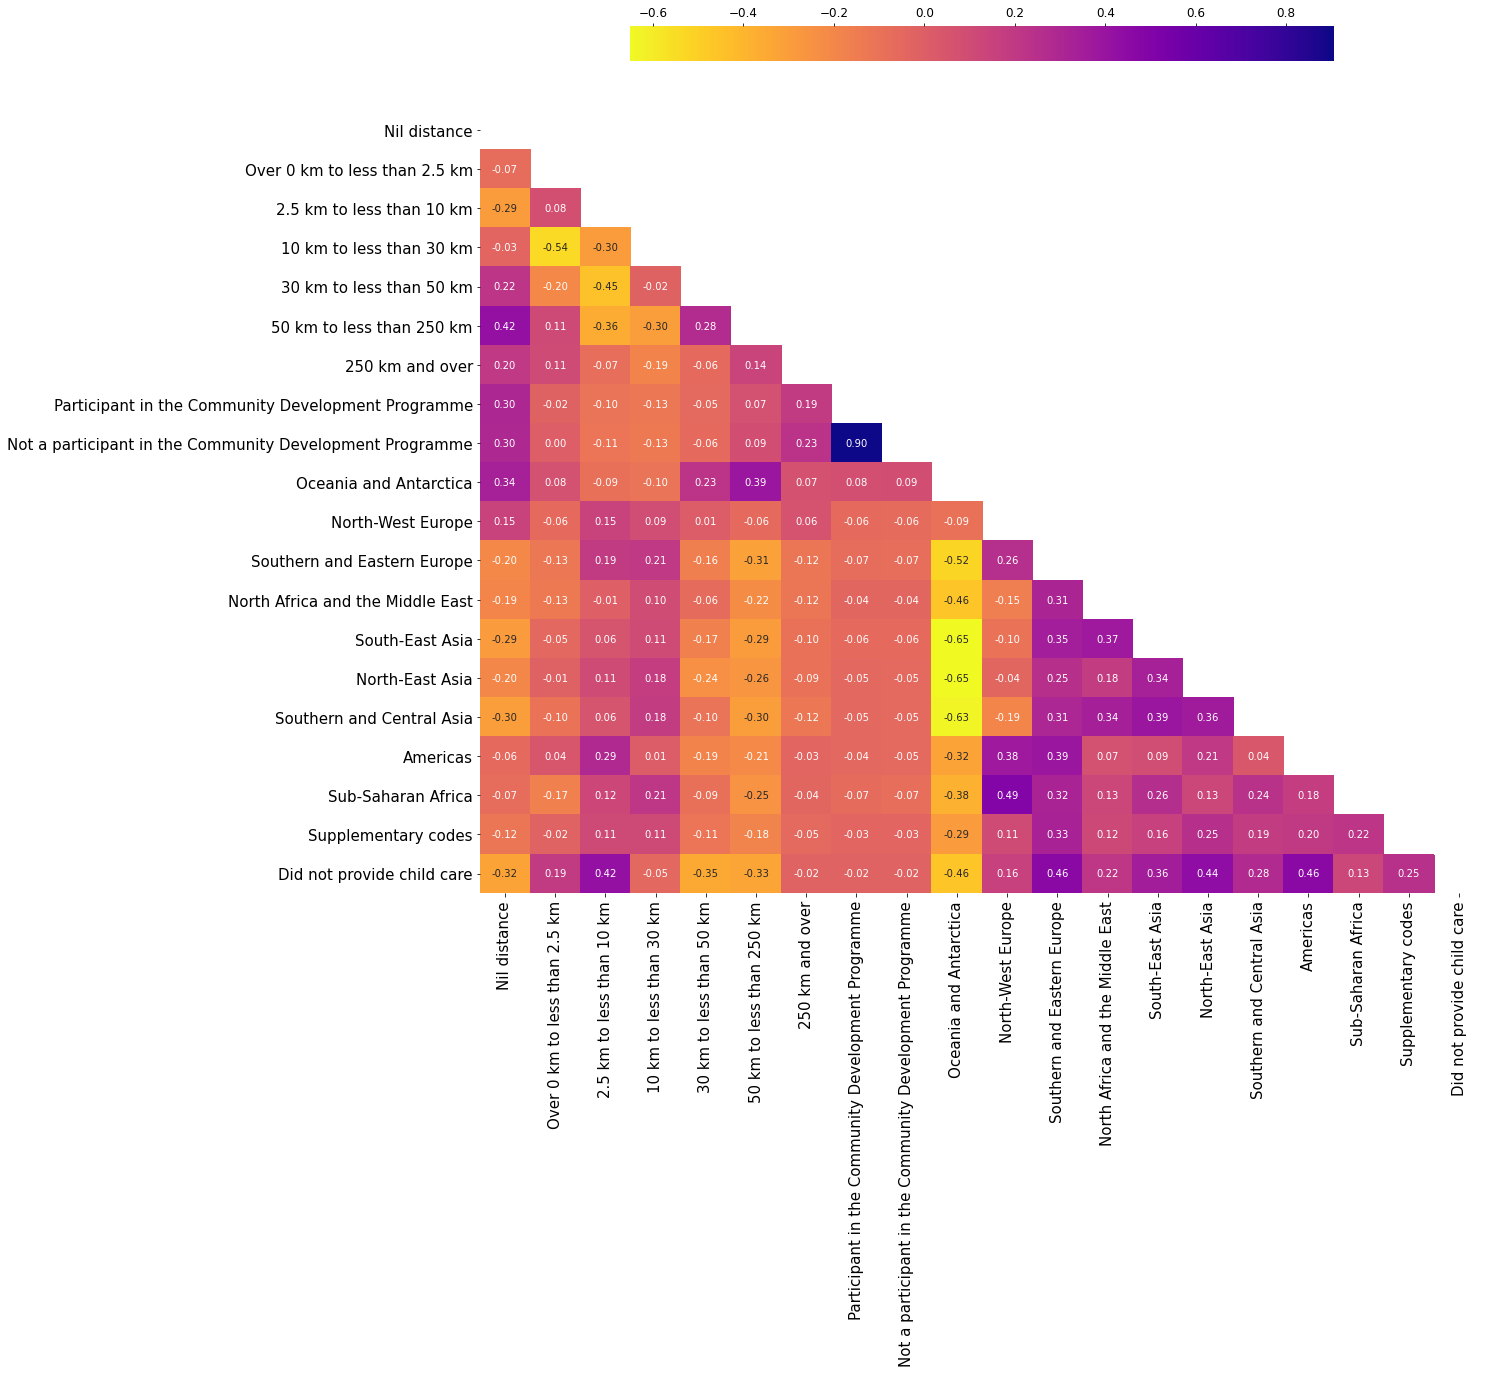

In [25]:
# Plot the drug usage correlations as a heatmap
mask = np.triu(np.ones_like(df_20.corr(), dtype=bool))

fig, axs = plt.subplots(figsize=(18,18))
res = sns.heatmap(df_20.corr(), 
            cmap= sns.color_palette('plasma_r', as_cmap=True),
            fmt=".2f", 
            annot=True,
            annot_kws={"fontsize":10},
            cbar_kws={"shrink": .7, 'use_gridspec':False, 'location': "top"},
            mask = mask
            )
#modify the axis labels
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)

cbar = axs.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

#plt.savefig('corr.png')
plt.show()

# Check Outliers

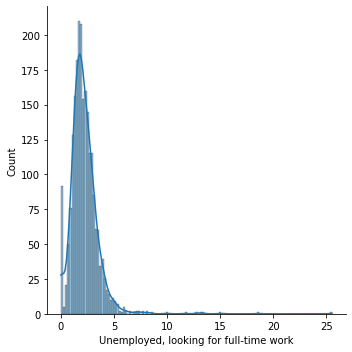

In [5]:

# check the distribution of the Target variable, i.e. Sales Price
sns.displot(df_clean['Unemployed, looking for full-time work'], kde=True);

In [6]:

# Target variable is right skewed. Outliers may affect the performance of the model

# Check the 99th%-ile value
q = df_clean['Unemployed, looking for full-time work'].quantile(0.99)
q

6.004799999999996

In [7]:

# drop the top 1% of house sales based on SalePrice 
df_clean = df_clean[df_clean['Unemployed, looking for full-time work'] < q]     # slice out all rows below the %ile val and re-assign
df_clean.reset_index(drop=True, inplace=True)            # reset indices
df_clean.shape           #check on the remaining data rows

(2197, 110)

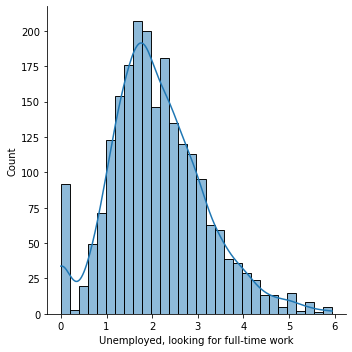

In [8]:
# check the distribution of the Target variable, i.e. Sales Price
sns.displot(df_clean['Unemployed, looking for full-time work'], kde=True);

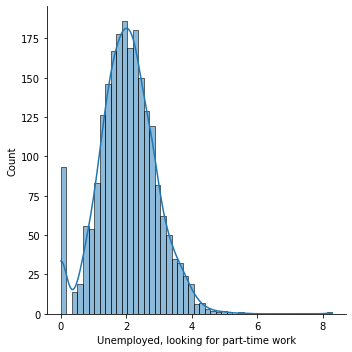

In [9]:

# check the distribution of the Target variable, i.e. Sales Price
sns.displot(df_clean['Unemployed, looking for part-time work'], kde=True);

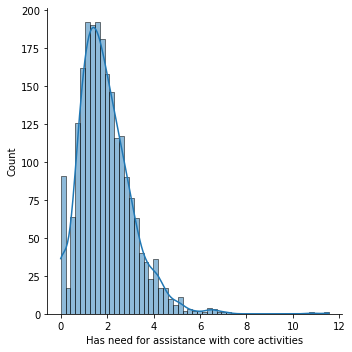

In [26]:

# check the distribution of the Target variable, i.e. Sales Price
sns.displot(df_clean['Has need for assistance with core activities'], kde=True);

In [27]:
# Check the 99th%-ile value
q = df_clean['Has need for assistance with core activities'].quantile(0.99)
q

5.222399999999998

In [28]:

# drop the top 1% of house sales based on SalePrice 
df_clean = df_clean[df_clean['Has need for assistance with core activities'] < q]     # slice out all rows below the %ile val and re-assign
df_clean.reset_index(drop=True, inplace=True)            # reset indices
df_clean.shape           #check on the remaining data rows

(2175, 110)

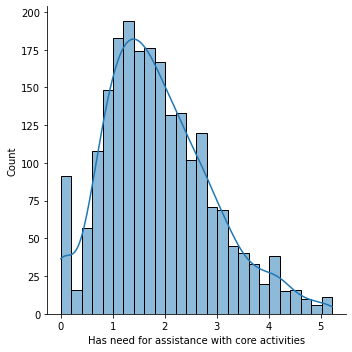

In [29]:
# check the distribution of the Target variable, i.e. Sales Price
sns.displot(df_clean['Has need for assistance with core activities'], kde=True);